In [9]:
import pandas as pd
import re
from unidecode import unidecode

df=pd.read_excel('Agu.xlsx',header=0)

print(df)
def limpiar_lugares(lugar,columna): 
    lugar=str(lugar)
    lugar=unidecode(lugar)
    lugar=lugar.upper()
    """ciudades=['BOGOTA','VILLAVICENCIO','NEIVA','COTA','PUERTO WILCHES','CASTILLA','ACACIAS','YOPAL','VILLANUEVA','OASIS']"""
    ciudades=['BOGOTA','VILLAVICENCIO','NEIVA','COTA','PUERTO WILCHES','CASTILLA','ACACIAS','OASIS']
    partes=lugar.split('-')
    if len(lugar)<15: 
        for ciudad in ciudades:
            match=re.search(rf'\b{ciudad}\b',lugar,flags=re.IGNORECASE)
            if match:
                return match.group()     
    return lugar

          NN Real Plate services               BL    Suppliers Vehicle Type  \
0    GS10402              DRZ894              ESP  ENTRAPETROL       PICKUP   
1    GS10400              LHR715  CAMERON SURFACE  ENTRAPETROL       PICKUP   
2    GS10393              FVN737             WLES  ENTRAPETROL       PICKUP   
3    GS10390              LQT416              MES  ENTRAPETROL       PICKUP   
4    GS10387              FVR346             DMHT   COSMOTRANS       PICKUP   
..       ...                 ...              ...          ...          ...   
319   GS9610              LQS612        LOGISTICS  ENTRAPETROL       PICKUP   
320   GS9609              FVS299              HSE  ENTRAPETROL       PICKUP   
321   GS9607              FVN737              HSE  ENTRAPETROL       PICKUP   
322   GS9562              TAR552        LOGISTICS   COSMOTRANS       PICKUP   
323   GS9520              LHV857        LOGISTICS  ENTRAPETROL       PICKUP   

                  Origin          Destination Fecha

In [16]:
# Convert date columns to datetime objects
df['Fecha y hora de creacion de OB'] = pd.to_datetime(df['Fecha y hora de creacion de OB'], format='%m/%d/%Y %H:%M:%S')
df['Fecha y hora de cargue'] = pd.to_datetime(df['Fecha y hora de cargue'], format='%m/%d/%Y %H:%M:%S')

# Calculate the difference in days between the two columns
df['Day_Difference'] = (df['Fecha y hora de cargue'] - df['Fecha y hora de creacion de OB']).dt.days

# Check if the day difference is 1 or if it's 0 and the time is after 2 pm
df['Check_Result'] = ((df['Day_Difference'] == 0) | ((df['Day_Difference'] == 1) & (df['Fecha y hora de creacion de OB'].dt.hour >= 14)))
#df=df[df['Check_Result']==True]

# Group by 'BL' and count the number of True values in 'Check_Result'
result_counts = df.groupby('BL')['Check_Result'].sum().reset_index()

# Rename the columns for clarity
result_counts.columns = ['Bussiness Line', 'Solicitudes fuera de tiempo']

# Sort the results by the number of True values (descending order)
result_counts = result_counts.sort_values(by='Solicitudes fuera de tiempo', ascending=False)

# Display the result
print(result_counts)

#Bussiness=Bussiness.sort_values(ascending=True)
#df['Check_Result']=(df['Day Difference']==0)

  

                             Bussiness Line  Solicitudes fuera de tiempo
7                                      DMHT                           30
9                                       ESP                           25
20                                LOGISTICS                           15
37                                     WLES                           15
22                                      MES                           15
17                                      HSE                           13
38                                     WLPS                            7
3                           CAMERON SURFACE                            7
29                           SUSTAINABILITY                            7
15                                      GSS                            6
36                                      WIT                            5
39                                      WPS                            5
10                               FACILITIES        

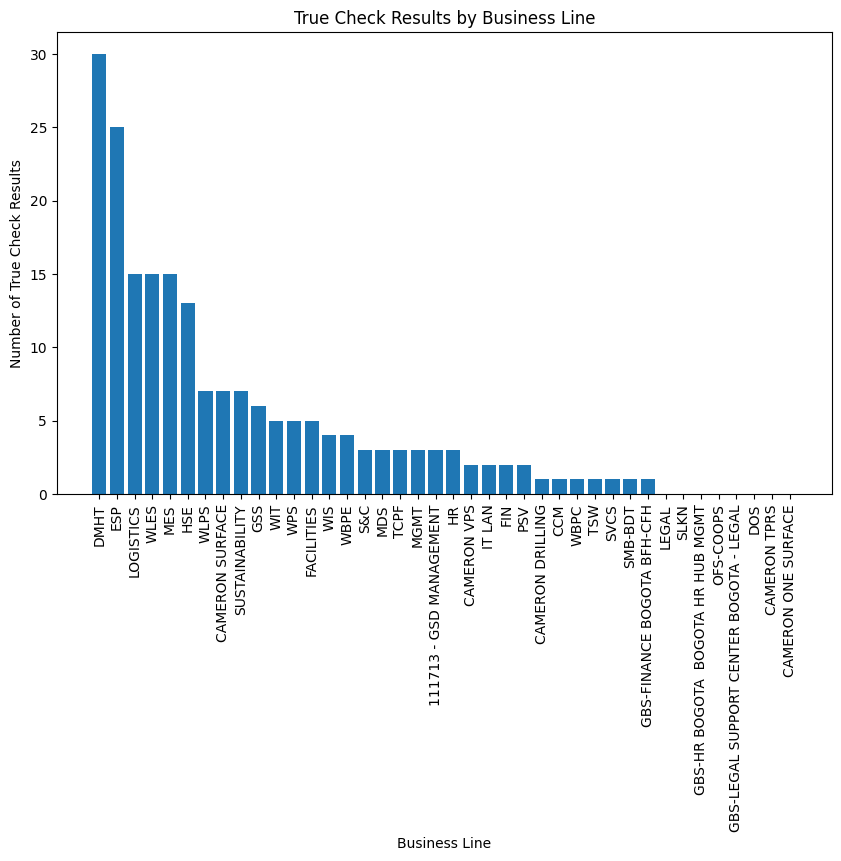

In [14]:
import matplotlib.pyplot as plt

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(result_counts['BL'], result_counts['True_Check_Results'])
plt.xlabel('Business Line')
plt.ylabel('Number of True Check Results')
plt.title('True Check Results by Business Line')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()
